In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Importing required libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reading Data

In [3]:
train_df = pd.read_csv("../input/digit-recognizer/train.csv")

In [4]:
test_df = pd.read_csv("../input/digit-recognizer/test.csv")

In [5]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# checking the shape of training and testing data.

training data contains 42000 samples of images i.e rows and 785 columns
testing data contains 28000 samples of images i.e rows and 784 columns

In [6]:
print("training data:",train_df.shape)    
print("testing data:",test_df.shape)

training data: (42000, 785)
testing data: (28000, 784)


# Splitting Data into training and testing set

dividing training data in X and y variable

In [7]:
X = train_df.iloc[:,1:].values
y = train_df.iloc[:,0].values
test_df = test_df.values

Checking shapes of X and y

In [8]:
print(X.shape)
print(y.shape)
print(test_df.shape)

(42000, 784)
(42000,)
(28000, 784)


checking shapes of all

In [9]:
X = X.reshape(-1,28,28,1)
test_df = test_df.reshape(-1,28,28,1)

In [10]:
print("X:",X.shape)
print("test_df:",test_df.shape)

X: (42000, 28, 28, 1)
test_df: (28000, 28, 28, 1)


Currently data is in the range of (0,255), for better perfomance of our neural network model we have to scale the data from range of (0,255) to (0,1).
to scale the data we divide each pixel by 255

In [11]:
X = X / 255
test_df = test_df / 255

using train test split for splitting data in X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

pixels of images are not in correct shape. Dataset contains 28 X 28 i.e 28 pixel heaigh and 28 pixel width grayscale image, thats why shape of each image should be 28 X 28 shape.

In [13]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("test_df:",test_df.shape)

X_train: (31500, 28, 28, 1)
X_test: (10500, 28, 28, 1)
test_df: (28000, 28, 28, 1)


Visualizing some images with matplotlib

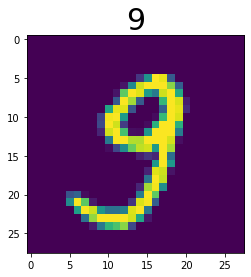

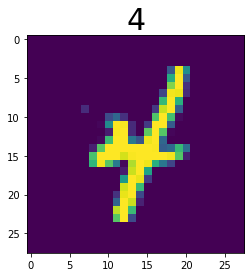

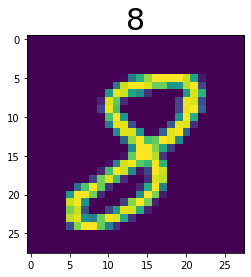

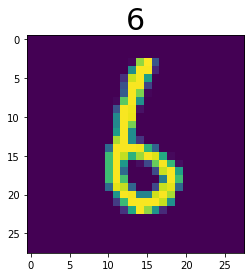

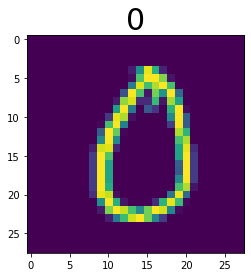

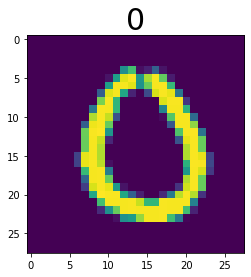

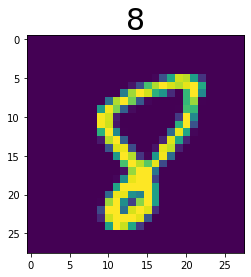

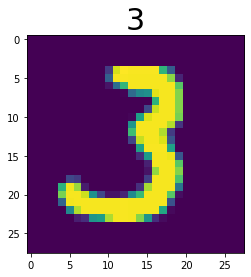

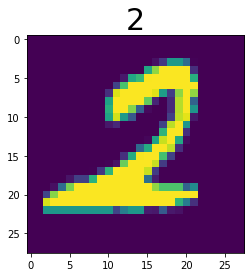

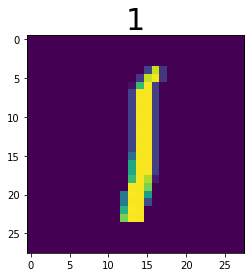

In [14]:
for i in range(1000,1010):
    plt.imshow(X_train[i])
    plt.title(y_train[i],fontdict={'fontsize':30})
    plt.show()

# Building a neural network model

creating a sequntial model

In [15]:
model_cnn = Sequential()

adding layer to sequential model

In [16]:
# adding convolutional2d layer with kernal size i.e feature detector size (5,5) and
# filters i.e no. of filters or feature detectors.
model_cnn.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=[28,28,1],padding='same'))


model_cnn.add(MaxPool2D(padding='same')) # adding Maxpool2D layer for pooling, with pool size of (2,2)

model_cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model_cnn.add(MaxPool2D(padding='same'))

model_cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model_cnn.add(MaxPool2D(padding='same'))

model_cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model_cnn.add(MaxPool2D(padding='same'))

# Now we have to flatten our pooled feature to column vector, The reason we do 
# this is that we're going to need to insert this data into an artificial neural 
#network later on.
model_cnn.add(Flatten())

# Now add Dense layer to Sequential model and use this flatten features as input 
model_cnn.add(Dense(256,activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dropout(0.5))

# Add last output generating layer in our model
model_cnn.add(Dense(10,activation='softmax',))

# getting model summary
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

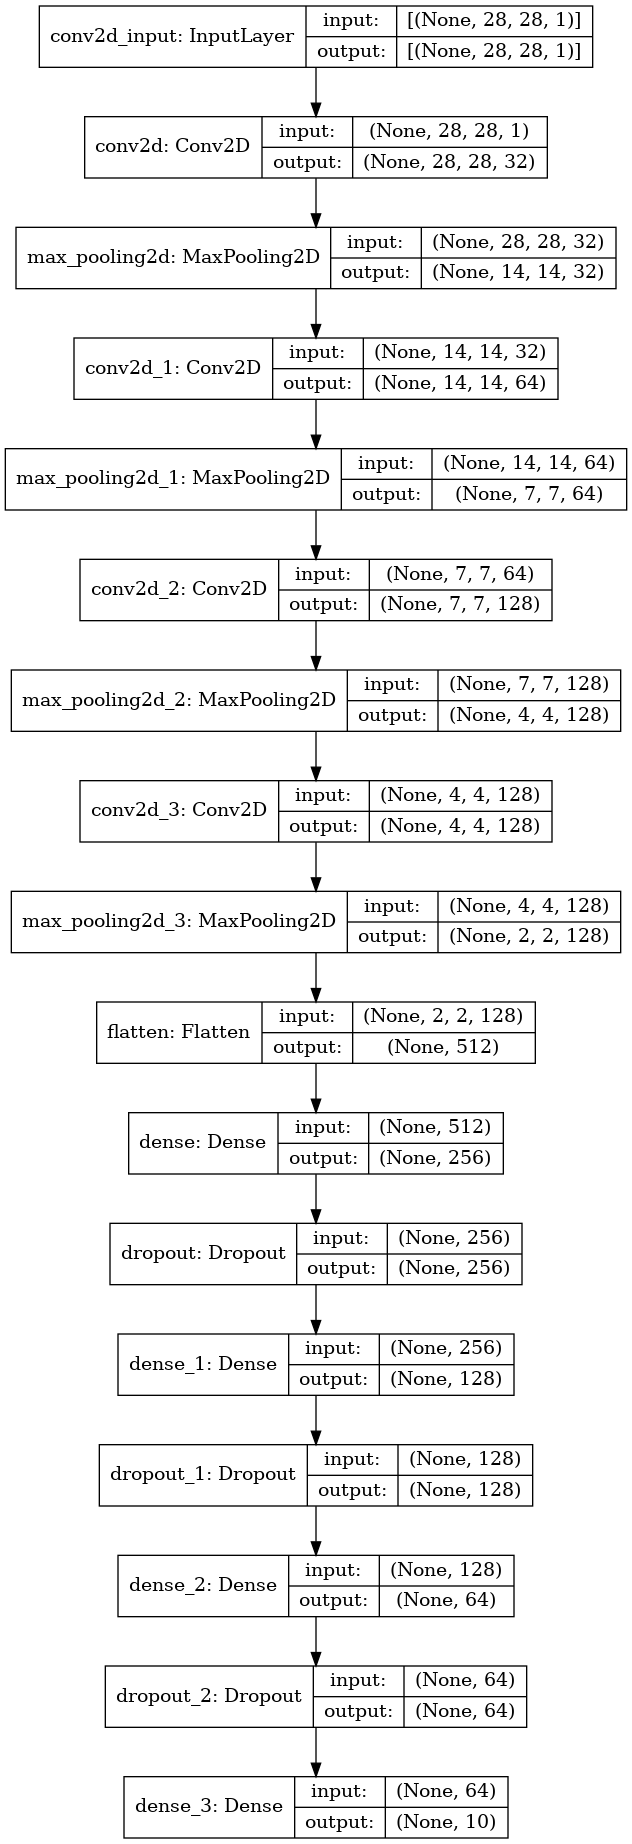

In [17]:
plot_model(model_cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

creating early stopping

In [18]:
# es = EarlyStopping(monitor='val_loss',patience=10,mode='min')

# Compiling Model

In [19]:
model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training The Model

In [20]:
model_cnn.fit(X_train, y_train,verbose=2,validation_data=(X_test,y_test),batch_size=128,epochs=30)

Epoch 1/30
247/247 - 9s - loss: 1.0090 - accuracy: 0.6438 - val_loss: 0.2018 - val_accuracy: 0.9520
Epoch 2/30
247/247 - 1s - loss: 0.1849 - accuracy: 0.9540 - val_loss: 0.0752 - val_accuracy: 0.9813
Epoch 3/30
247/247 - 1s - loss: 0.1202 - accuracy: 0.9735 - val_loss: 0.0520 - val_accuracy: 0.9857
Epoch 4/30
247/247 - 1s - loss: 0.0862 - accuracy: 0.9812 - val_loss: 0.0548 - val_accuracy: 0.9898
Epoch 5/30
247/247 - 1s - loss: 0.0715 - accuracy: 0.9847 - val_loss: 0.0544 - val_accuracy: 0.9877
Epoch 6/30
247/247 - 1s - loss: 0.0575 - accuracy: 0.9875 - val_loss: 0.0750 - val_accuracy: 0.9826
Epoch 7/30
247/247 - 1s - loss: 0.0444 - accuracy: 0.9902 - val_loss: 0.0440 - val_accuracy: 0.9899
Epoch 8/30
247/247 - 1s - loss: 0.0487 - accuracy: 0.9891 - val_loss: 0.0596 - val_accuracy: 0.9878
Epoch 9/30
247/247 - 1s - loss: 0.0381 - accuracy: 0.9918 - val_loss: 0.0667 - val_accuracy: 0.9868
Epoch 10/30
247/247 - 1s - loss: 0.0361 - accuracy: 0.9926 - val_loss: 0.0468 - val_accuracy: 0.9906

Creating Dataframe from accuracy and loss

In [21]:
model_cnn_loss_df = pd.DataFrame(model_cnn.history.history)

In [22]:
model_cnn_loss_df

,loss,accuracy,val_loss,val_accuracy
0,1.008997,0.643841,0.201849,0.952000
1,0.184865,0.953968,0.075171,0.981333
2,0.120167,0.973492,0.051992,0.985714
3,0.086219,0.981206,0.054808,0.989810
4,0.071491,0.984667,0.054353,0.987714
5,0.057503,0.987460,0.075037,0.982571
6,0.044427,0.990159,0.043997,0.989905
7,0.048680,0.989111,0.059587,0.987810
8,0.038074,0.991778,0.066717,0.986762
9,0.036126,0.992571,0.046832,0.990571


# Visualizing the Loss an Accuracy of model

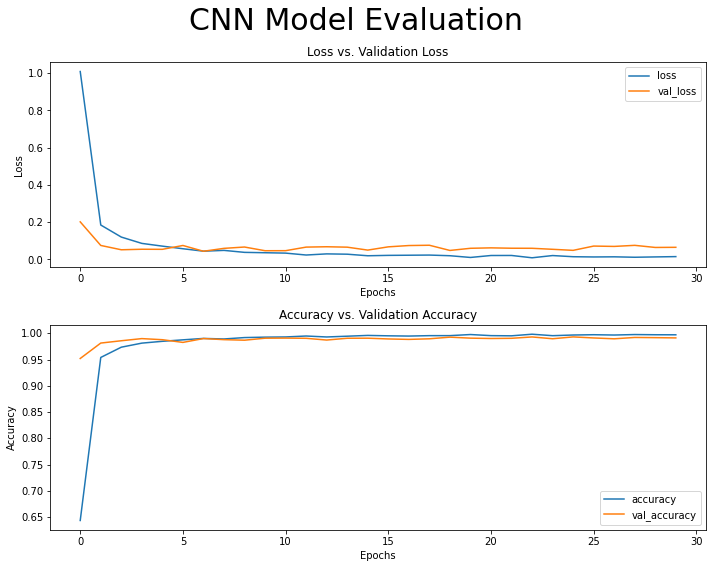

In [23]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot loss and validation loss
model_cnn_loss_df[['loss','val_loss']].plot(ax=axes[0])
axes[0].set_title('Loss vs. Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')

# Plot accuracy and validation accuracy
model_cnn_loss_df[['accuracy','val_accuracy']].plot(ax=axes[1])
axes[1].set_title('Accuracy vs. Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')

# Adjust layout
fig.suptitle('CNN Model Evaluation',size=30)
plt.tight_layout()
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [25]:
model_cnn_prediction = model_cnn.predict(X_test)
model_cnn_prediction = np.argmax(model_cnn_prediction,axis=1)

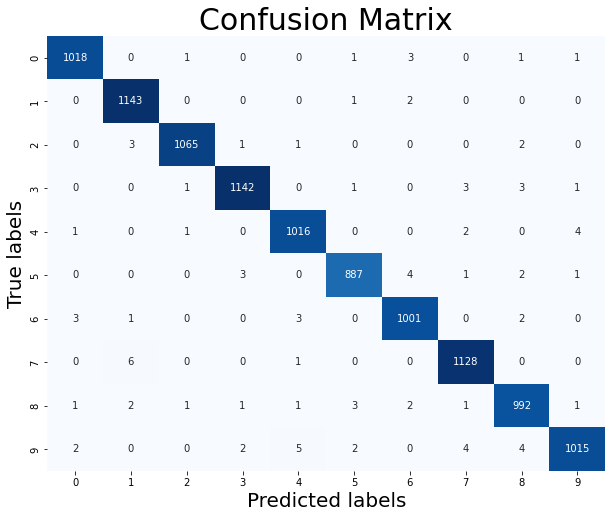

In [26]:
cm = confusion_matrix(y_test, model_cnn_prediction)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels',size=20)
plt.ylabel('True labels',size=20)
plt.title('Confusion Matrix',size=30)
plt.show()

In [27]:
print(classification_report(y_test,model_cnn_prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1025
           1       0.99      1.00      0.99      1146
           2       1.00      0.99      0.99      1072
           3       0.99      0.99      0.99      1151
           4       0.99      0.99      0.99      1024
           5       0.99      0.99      0.99       898
           6       0.99      0.99      0.99      1010
           7       0.99      0.99      0.99      1135
           8       0.99      0.99      0.99      1005
           9       0.99      0.98      0.99      1034

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



# Pridicting the result

In [28]:
model_cnn_prediction = model_cnn.predict(test_df)

In [29]:
model_cnn_prediction = np.argmax(model_cnn_prediction,axis=1)

In [30]:
model_cnn_prediction

array([2, 0, 9, ..., 3, 9, 2])

# Transfer learning Models

## VGG16

In [31]:
import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [32]:
padding_width = ((50, 50), (50, 50), (0, 0))

In [33]:
lst1 = []
for i in range(31500):
    gray_image_uint8 = np.uint8(X_train[i] * 255.0)
    color_image = cv2.cvtColor(gray_image_uint8, cv2.COLOR_GRAY2BGR)
    padded_image = np.pad(color_image, padding_width, mode='constant', constant_values=0)
    lst1.append(padded_image)

lst2 = []
for i in range(10500):
    gray_image_uint8 = np.uint8(X_test[i] * 255.0)
    color_image = cv2.cvtColor(gray_image_uint8, cv2.COLOR_GRAY2BGR)
    padded_image = np.pad(color_image, padding_width, mode='constant', constant_values=0)
    lst2.append(padded_image)
    
lst3 = []
for i in range(28000):
    gray_image_uint8 = np.uint8(test_df[i] * 255.0)
    color_image = cv2.cvtColor(gray_image_uint8, cv2.COLOR_GRAY2BGR)
    padded_image = np.pad(color_image, padding_width, mode='constant', constant_values=0)
    lst3.append(padded_image)

In [34]:
X_train_new = np.concatenate([lst1])
X_test_new = np.concatenate([lst2])
test_df_new = np.concatenate([lst3])

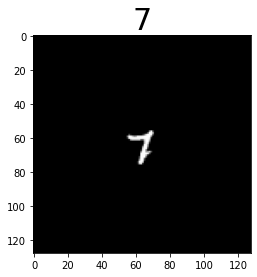

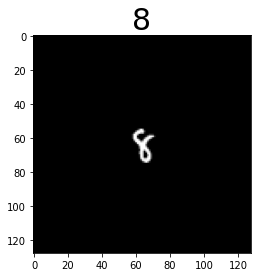

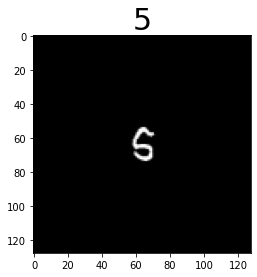

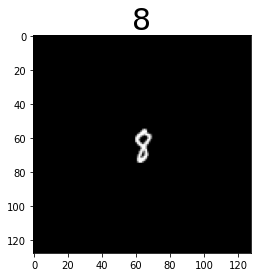

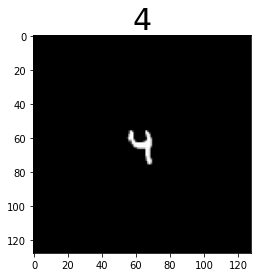

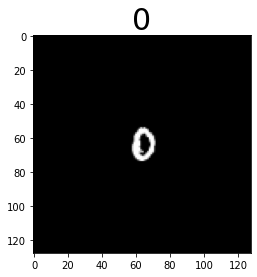

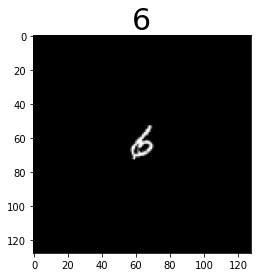

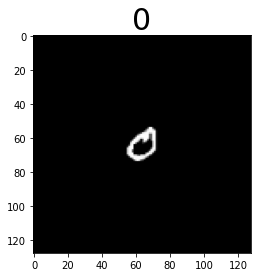

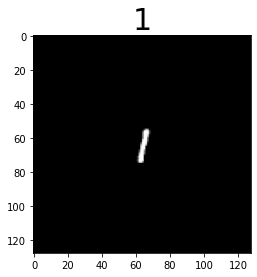

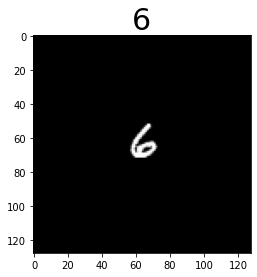

In [35]:
for i in range(10):
    plt.imshow(X_train_new[i])
    plt.title(y_train[i],fontdict={'fontsize':30})
    plt.show()

In [36]:
vgg = VGG16(input_shape=(128, 128, 3), weights='imagenet', include_top=False)

vgg.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [37]:
# our layers - you can add more if you want
inputs = keras.Input(shape=(128, 128, 3))
X = vgg(inputs,training=False)
X = MaxPool2D()(X)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)

X = Dense(10, activation='softmax')(X)

In [38]:
# create a model object
vgg_model = Model(inputs=inputs, outputs=X)

# view the structure of the model
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 15,768,906
Trainable params: 1,054,218
Non-trainable params: 14,714,688
_________________________________________

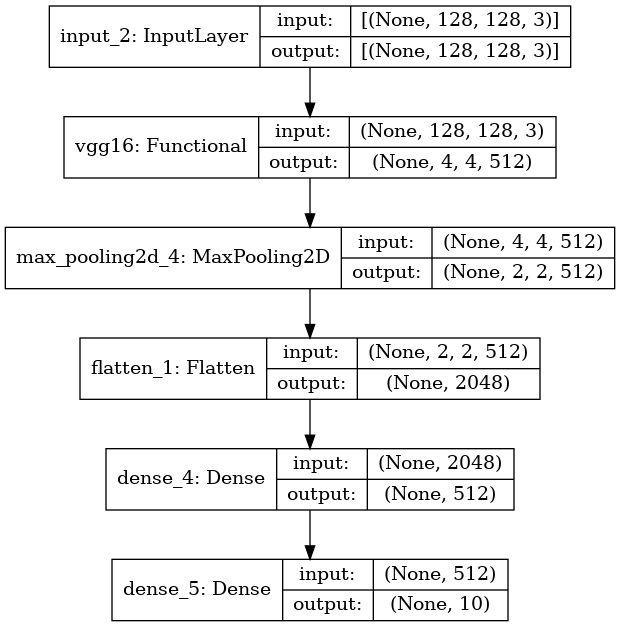

In [39]:
plot_model(vgg_model, to_file='modelvgg16_plot.png', show_shapes=True, show_layer_names=True)

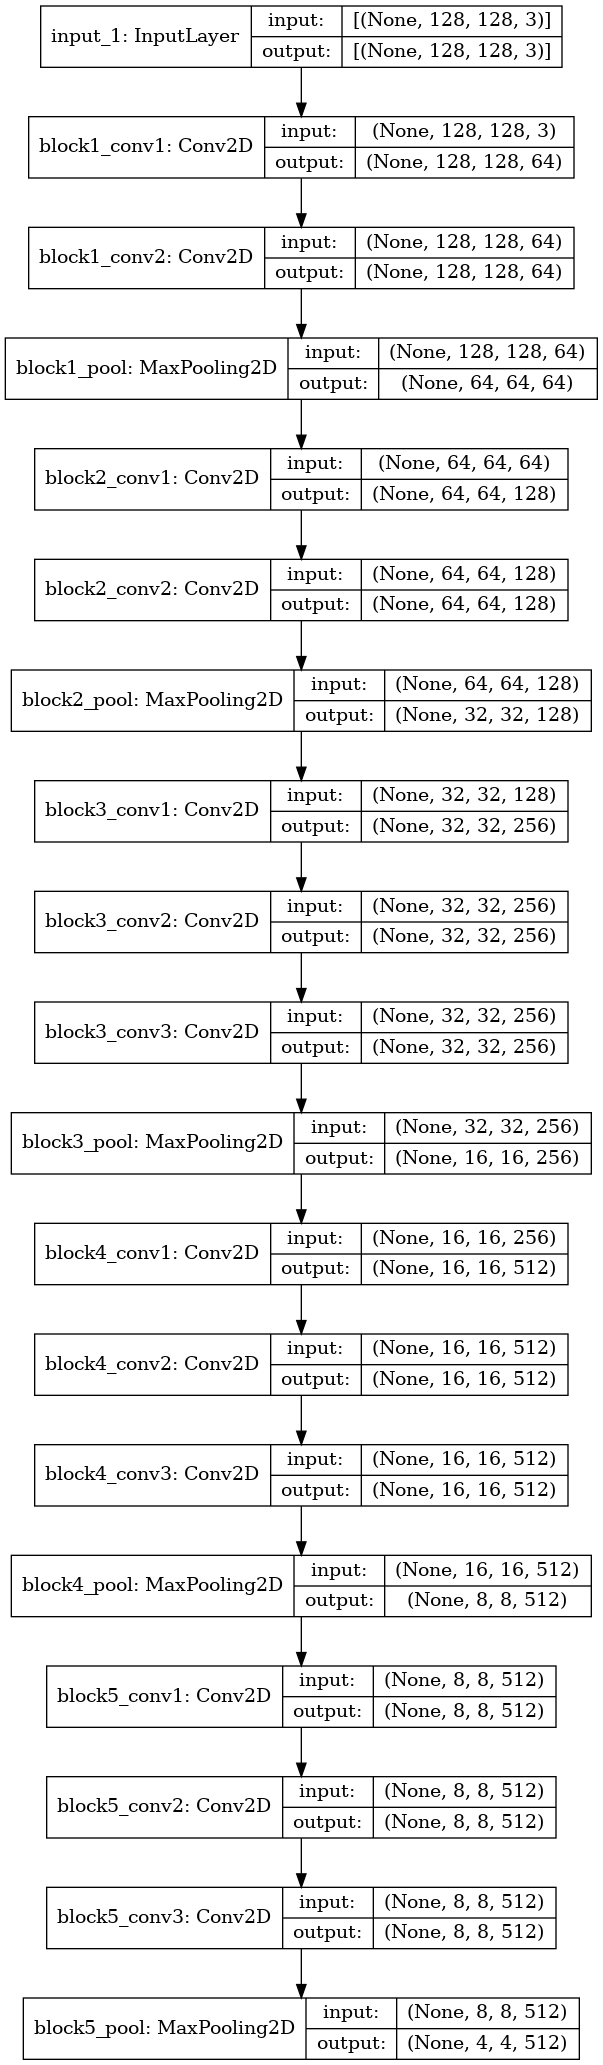

In [40]:
# vgg16 architecture
plot_model(vgg, to_file='modelvgg_plot.png', show_shapes=True, show_layer_names=True)

In [41]:
# tell the model which cost and optimization method to use
vgg_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [42]:
vgg_model.fit(
  X_train_new,
  y_train,
  validation_data=(X_test_new,y_test),
  epochs=30,
  batch_size=128
)

Epoch 1/30
247/247 [==============================] - 30s 102ms/step - loss: 1.0143 - accuracy: 0.8789 - val_loss: 0.2522 - val_accuracy: 0.9330
Epoch 2/30
247/247 [==============================] - 23s 94ms/step - loss: 0.1766 - accuracy: 0.9509 - val_loss: 0.1563 - val_accuracy: 0.9568
Epoch 3/30
247/247 [==============================] - 23s 94ms/step - loss: 0.1268 - accuracy: 0.9630 - val_loss: 0.1181 - val_accuracy: 0.9656
Epoch 4/30
247/247 [==============================] - 23s 94ms/step - loss: 0.1158 - accuracy: 0.9657 - val_loss: 0.2144 - val_accuracy: 0.9445
Epoch 5/30
247/247 [==============================] - 23s 94ms/step - loss: 0.1005 - accuracy: 0.9694 - val_loss: 0.1001 - val_accuracy: 0.9723
Epoch 6/30
247/247 [==============================] - 23s 94ms/step - loss: 0.0762 - accuracy: 0.9764 - val_loss: 0.1248 - val_accuracy: 0.9684
Epoch 7/30
247/247 [==============================] - 23s 94ms/step - loss: 0.0806 - accuracy: 0.9748 - val_loss: 0.1572 - val_accuracy

In [43]:
vgg_model_loss_df = pd.DataFrame(vgg_model.history.history)

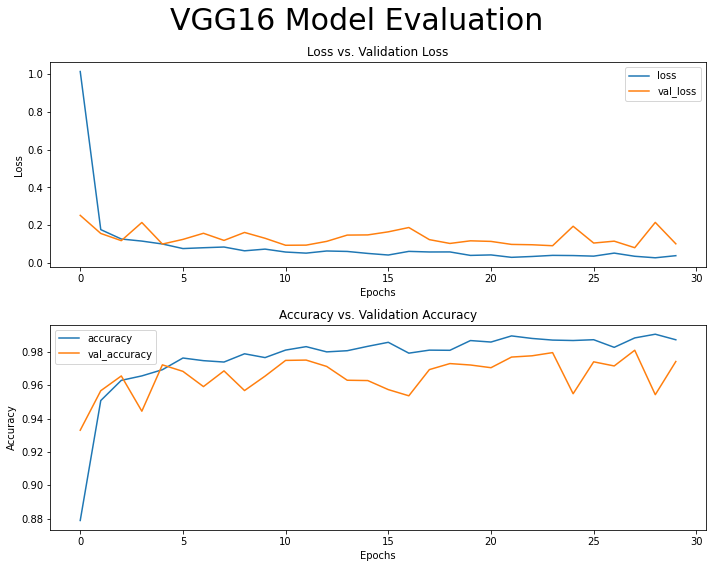

In [44]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot loss and validation loss
vgg_model_loss_df[['loss','val_loss']].plot(ax=axes[0])
axes[0].set_title('Loss vs. Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')

# Plot accuracy and validation accuracy
vgg_model_loss_df[['accuracy','val_accuracy']].plot(ax=axes[1])
axes[1].set_title('Accuracy vs. Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')

# Adjust layout
fig.suptitle('VGG16 Model Evaluation',size=30)
plt.tight_layout()
plt.show()

## ResNet50

In [45]:
from tensorflow.keras.applications import ResNet50

# add preprocessing layer to the front of ResNet50
rsnet = ResNet50(input_shape=(128, 128, 3), weights='imagenet', include_top=False)

#don't train existing weights
for layer in rsnet.layers:
  layer.trainable = False

# our layers - you can add more if you want
inputs = keras.Input(shape=(128, 128, 3))
X = rsnet(inputs,training=False)
X = MaxPool2D()(X)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)

X = Dense(10, activation='softmax')(X)

# create a model object
resnet_model = Model(inputs=inputs, outputs=X)

94781440/94765736 [==============================] - 0s 0us/step


In [46]:
# tell the model what cost and optimization method to use
resnet_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [47]:
# view the structure of the model
resnet_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 27,787,658
Trainable params: 4,199,946
Non-trainable params: 23,587,712
_______________________________________

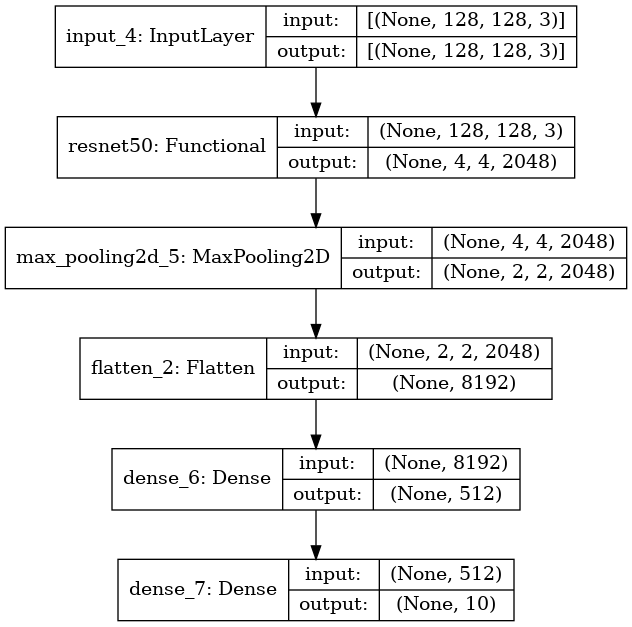

In [48]:
# ResNet50 architecture
plot_model(resnet_model, to_file='modelresnet50_plot.png', show_shapes=True, show_layer_names=True)

In [49]:
resnet_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [50]:
resnet_model.fit(
  X_train_new,
  y_train,
  validation_data=(X_test_new,y_test),
  epochs=30,
  batch_size=128
)

Epoch 1/30
247/247 [==============================] - 27s 98ms/step - loss: 0.7315 - accuracy: 0.8677 - val_loss: 0.2060 - val_accuracy: 0.9346
Epoch 2/30
247/247 [==============================] - 22s 89ms/step - loss: 0.1593 - accuracy: 0.9485 - val_loss: 0.2138 - val_accuracy: 0.9285
Epoch 3/30
247/247 [==============================] - 22s 89ms/step - loss: 0.1308 - accuracy: 0.9580 - val_loss: 0.1746 - val_accuracy: 0.9479
Epoch 4/30
247/247 [==============================] - 22s 90ms/step - loss: 0.0989 - accuracy: 0.9682 - val_loss: 0.1289 - val_accuracy: 0.9587
Epoch 5/30
247/247 [==============================] - 22s 89ms/step - loss: 0.0809 - accuracy: 0.9734 - val_loss: 0.1462 - val_accuracy: 0.9545
Epoch 6/30
247/247 [==============================] - 22s 89ms/step - loss: 0.0741 - accuracy: 0.9751 - val_loss: 0.1759 - val_accuracy: 0.9470
Epoch 7/30
247/247 [==============================] - 22s 89ms/step - loss: 0.0853 - accuracy: 0.9719 - val_loss: 0.1373 - val_accuracy:

In [51]:
resnet_model_loss_df = pd.DataFrame(resnet_model.history.history)

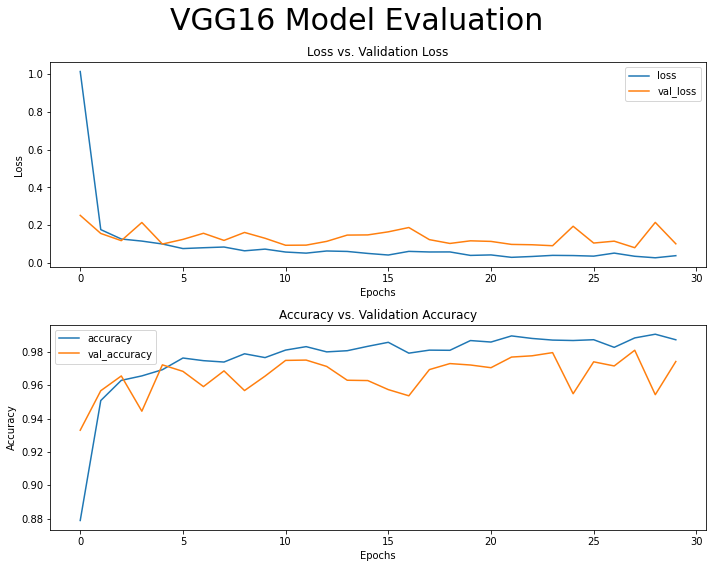

In [52]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot loss and validation loss
vgg_model_loss_df[['loss','val_loss']].plot(ax=axes[0])
axes[0].set_title('Loss vs. Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')

# Plot accuracy and validation accuracy
vgg_model_loss_df[['accuracy','val_accuracy']].plot(ax=axes[1])
axes[1].set_title('Accuracy vs. Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')

# Adjust layout
fig.suptitle('VGG16 Model Evaluation',size=30)
plt.tight_layout()
plt.show()

In [53]:
df_all = np.concatenate([[model_cnn_loss_df["val_accuracy"],vgg_model_loss_df["val_accuracy"],resnet_model_loss_df["val_accuracy"]]],axis=1)

In [54]:
import plotly.graph_objects as go

# Create traces for each model
trace_cnn = go.Scatter(x=model_cnn_loss_df.index, y=model_cnn_loss_df["val_accuracy"], mode='lines', name='CNN Model')
trace_resnet = go.Scatter(x=resnet_model_loss_df.index, y=resnet_model_loss_df["val_accuracy"], mode='lines', name='ResNet50 Model')
trace_vgg = go.Scatter(x=vgg_model_loss_df.index, y=vgg_model_loss_df["val_accuracy"], mode='lines', name='VGG16 Model')

# Create figure object
fig = go.Figure()

# Add traces to the figure
fig.add_trace(trace_cnn)
fig.add_trace(trace_resnet)
fig.add_trace(trace_vgg)

# Update layout
fig.update_layout(
    title='Model Accuracies',
    xaxis_title='Epochs',
    yaxis_title='Validation Accuracy',
    title_font=dict(size=30, color='darkcyan')
)

# Show the plot
fig.show()


In [55]:
model_cnn.save("model_cnn.h5")

In [56]:
vgg_model.save("model_vgg.h5")

In [57]:
resnet_model.save("model_resnet.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

